In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [2]:
df = pd.read_csv("../../Data/02.통합.csv", index_col=0)
df.columns

Index(['년도', '시도', '총인구', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '빈집수',
       '협회 및 단체, 수리 및 기타 개인서비스업 소멸', '도매 및 소매업 신생', '교육서비스업 소멸', '예금은행대출금액',
       '예금액'],
      dtype='object')

In [3]:
df_all = df[['전출인구', '출생아수', '초등학생인원수', 
             '산부인과의원수', 
             '협회 및 단체, 수리 및 기타 개인서비스업 소멸', '도매 및 소매업 신생', '교육서비스업 소멸',
             '예금은행대출금액', '예금액']]
df_all.head()

,전출인구,출생아수,초등학생인원수,산부인과의원수,"협회 및 단체, 수리 및 기타 개인서비스업 소멸",도매 및 소매업 신생,교육서비스업 소멸,예금은행대출금액,예금액
0,1821303,112129,739619,286,7235,49143,6822,248468.3,13718.5
1,1620640,84066,469392,395,6229,48097,4749,462443.1,532689.2
2,423864,29504,190166,65,1933,12612,1530,57288.6,6703.3
3,496161,25831,160821,82,2093,13902,1510,77411.6,59554.5
4,363224,19340,136309,86,1301,9981,1188,46578.5,37541.7


<AxesSubplot: >

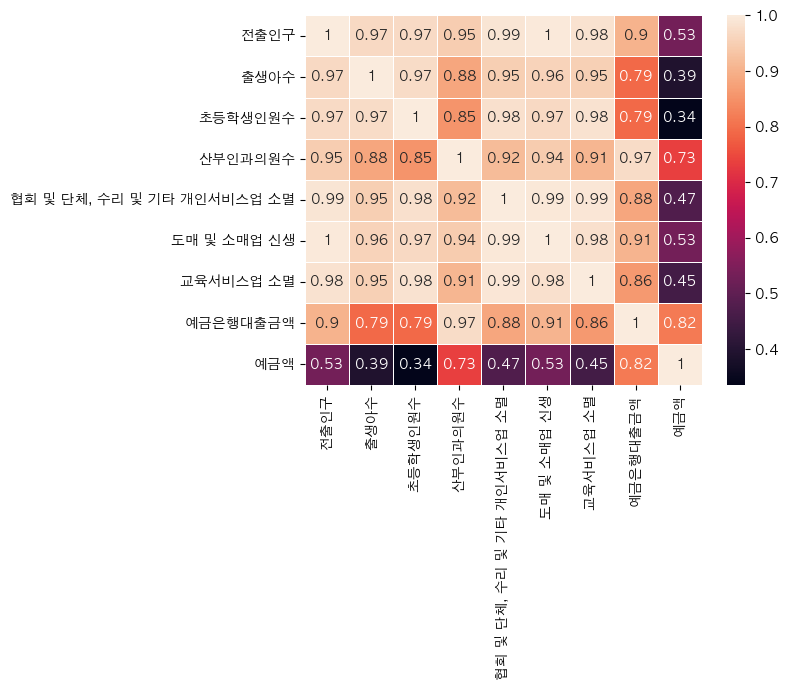

In [4]:
sns.heatmap(
    df_all.corr(),
    annot=True,
    linewidths= 0.5,
)

In [5]:
df_all.T
aa = df_all.T.copy()
aa.index
# df.시도[:17]

Index(['전출인구', '출생아수', '초등학생인원수', '산부인과의원수', '협회 및 단체, 수리 및 기타 개인서비스업 소멸',
       '도매 및 소매업 신생', '교육서비스업 소멸', '예금은행대출금액', '예금액'],
      dtype='object')

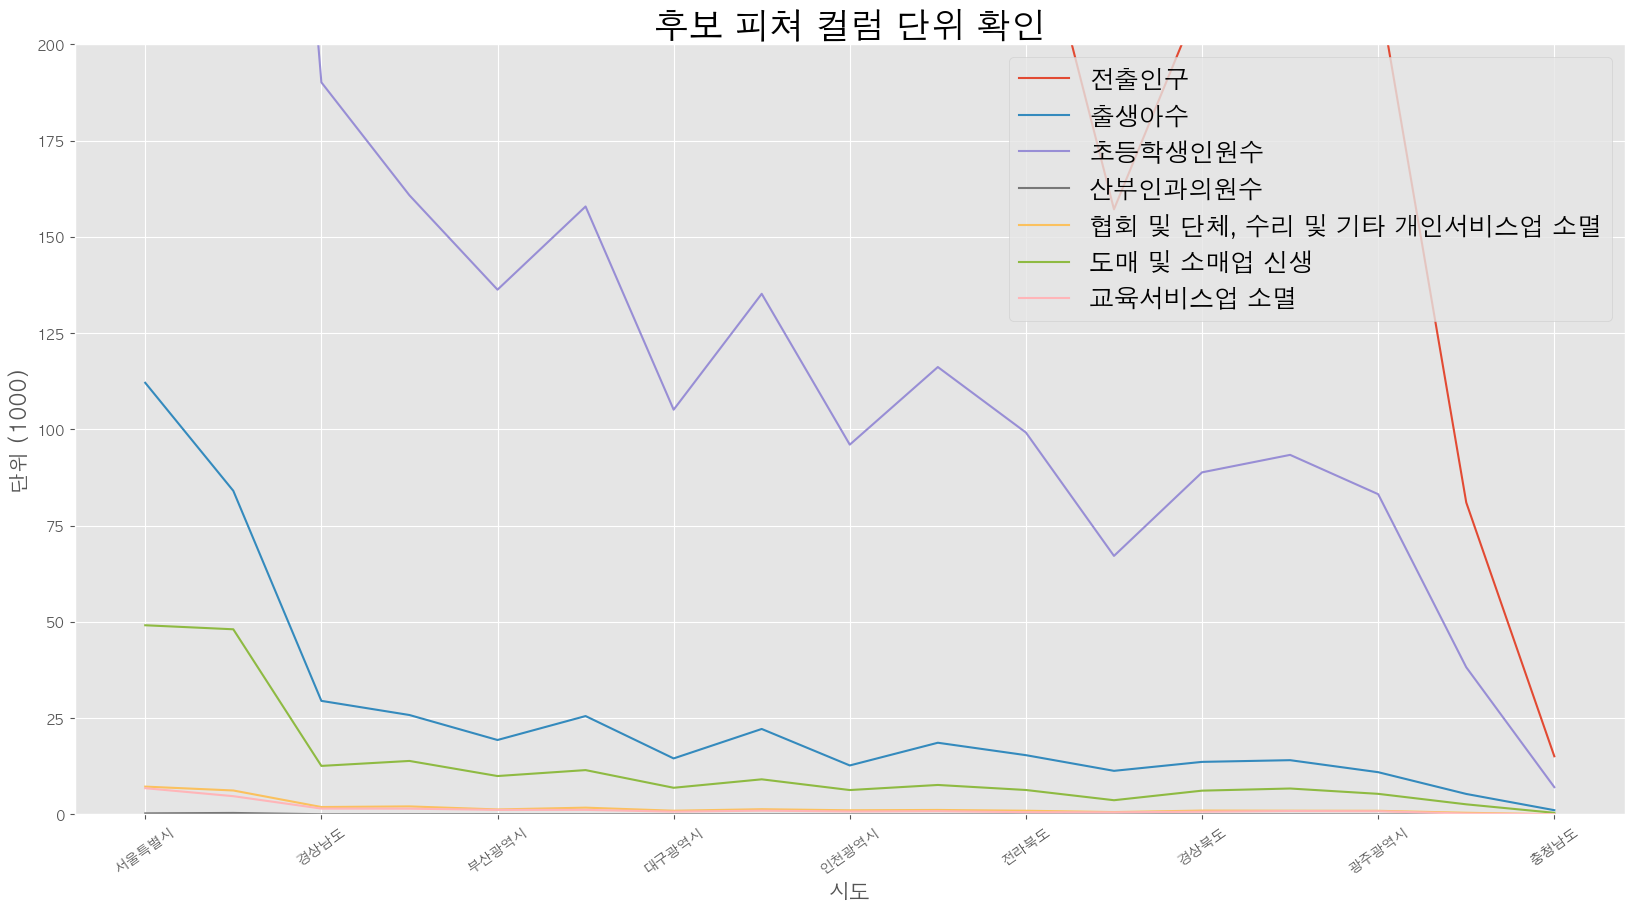

In [6]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1) #하나짜리 그래프

for i in range(7):
    ax.plot(
        aa.iloc[i, :17]/1000,
        label=aa.index[i],
    )

ax.legend(loc='best', fontsize=18)
ax.set_title('후보 피쳐 컬럼 단위 확인', size=25)
ax.set_xlabel('시도', size=15)
ax.set_ylabel('단위 (1000)', size=15)
ax.set_xticklabels(df.시도[:17], rotation=35)
ax.set_ylim(0, 200)

plt.show()

---
## 전체 k-means

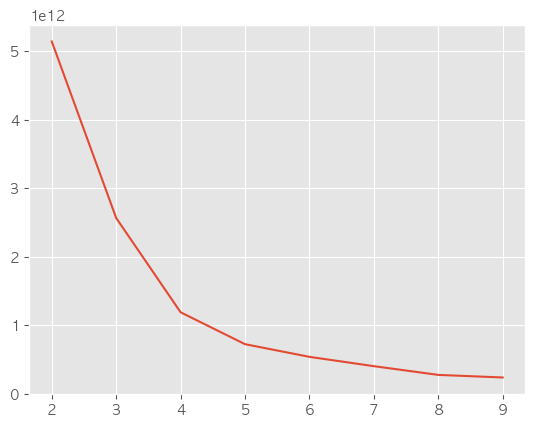

In [7]:
from sklearn.cluster import KMeans

scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k)
    km.fit(df_all)
    scores.append(km.inertia_)
    
plt.plot(range(2, 10), scores)
plt.show()

In [8]:
data_points = df_all.values
kmeans = KMeans(n_clusters=5).fit(data_points) #n_clusters: 5분류
df_all['cluster_id'] = kmeans.labels_

df_all.head()

,전출인구,출생아수,초등학생인원수,산부인과의원수,"협회 및 단체, 수리 및 기타 개인서비스업 소멸",도매 및 소매업 신생,교육서비스업 소멸,예금은행대출금액,예금액,cluster_id
0,1821303,112129,739619,286,7235,49143,6822,248468.3,13718.5,0
1,1620640,84066,469392,395,6229,48097,4749,462443.1,532689.2,2
2,423864,29504,190166,65,1933,12612,1530,57288.6,6703.3,4
3,496161,25831,160821,82,2093,13902,1510,77411.6,59554.5,4
4,363224,19340,136309,86,1301,9981,1188,46578.5,37541.7,4


---
## 카테고리화

In [9]:
df1 = df_all[['출생아수', '초등학생인원수', '전출인구', '산부인과의원수']]
df2 = df_all[['협회 및 단체, 수리 및 기타 개인서비스업 소멸', '도매 및 소매업 신생', '교육서비스업 소멸']]
df3 = df_all[['예금은행대출금액', '예금액']]

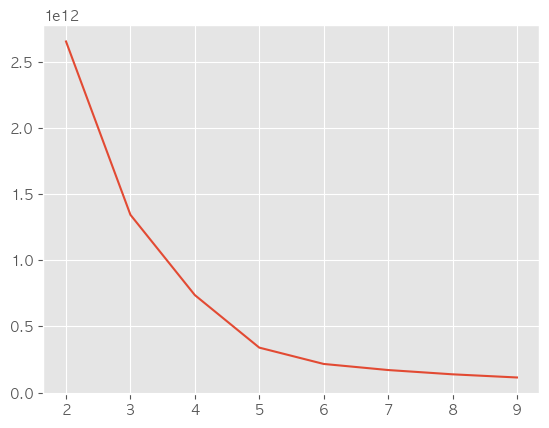

In [10]:
scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k)
    km.fit(df1)
    scores.append(km.inertia_)
    
plt.plot(range(2, 10), scores)

data_points = df1.values
kmeans = KMeans(n_clusters=5).fit(data_points) #n_clusters: 5분류
df1['cluster_id'] = kmeans.labels_

plt.show()

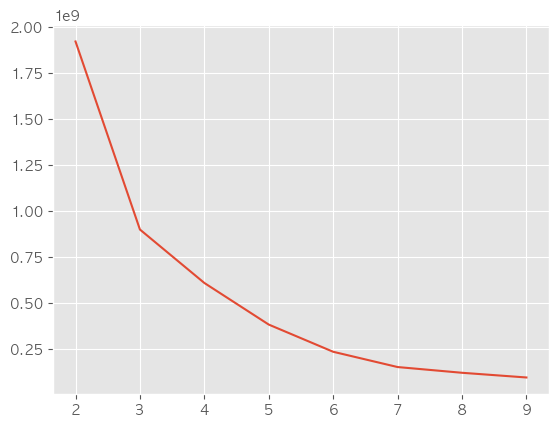

In [11]:
scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k)
    km.fit(df2)
    scores.append(km.inertia_)
    
plt.plot(range(2, 10), scores)

data_points = df2.values
kmeans = KMeans(n_clusters=5).fit(data_points) #n_clusters: 5분류
df2['cluster_id'] = kmeans.labels_

plt.show()

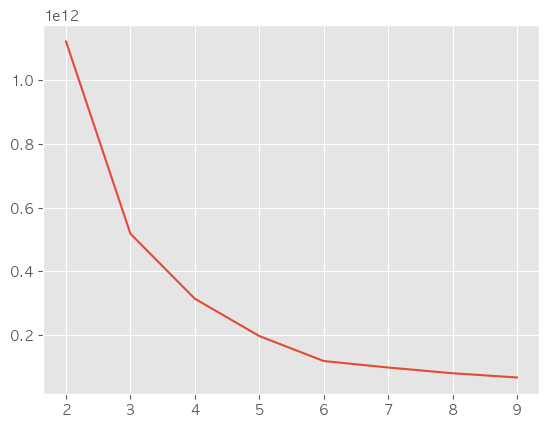

In [12]:
scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k)
    km.fit(df3)
    scores.append(km.inertia_)
    
plt.plot(range(2, 10), scores)

data_points = df3.values
kmeans = KMeans(n_clusters=5).fit(data_points) #n_clusters: 5분류
df3['cluster_id'] = kmeans.labels_

plt.show()

In [13]:
# 출생 및 인구 / 기업
result = pd.DataFrame(df1.cluster_id == df2.cluster_id)
result.value_counts()

cluster_id
False         125
True           11
dtype: int64

In [14]:
# 기업 / 예금
result = pd.DataFrame(df2.cluster_id == df3.cluster_id)
result.value_counts()

cluster_id
False         96
True          40
dtype: int64

In [15]:
# 출생 및 인구 / 예금
result = pd.DataFrame(df1.cluster_id == df3.cluster_id)
result.value_counts()

cluster_id
False         69
True          67
dtype: int64

---
## 1순위 각각

In [16]:
df1 = df_all[['출생아수']]
df2 = df_all[['협회 및 단체, 수리 및 기타 개인서비스업 소멸']]
df3 = df_all[['전출인구']]
df4 = df_all[['산부인과의원수']]

In [17]:
def makeK(df):
    scores = []
    for k in range(2, 10):
        km = KMeans(n_clusters=k)
        km.fit(df)
        scores.append(km.inertia_)
        
    plt.plot(range(2, 10), scores)

    data_points = df.values
    kmeans = KMeans(n_clusters=5).fit(data_points) #n_clusters: 5분류
    df['cluster_id'] = kmeans.labels_

    plt.show()

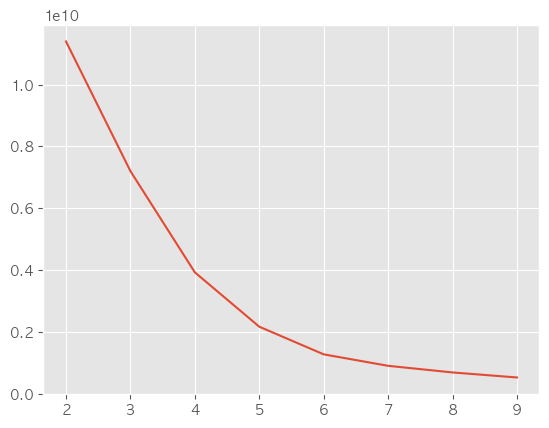

In [18]:
makeK(df1)

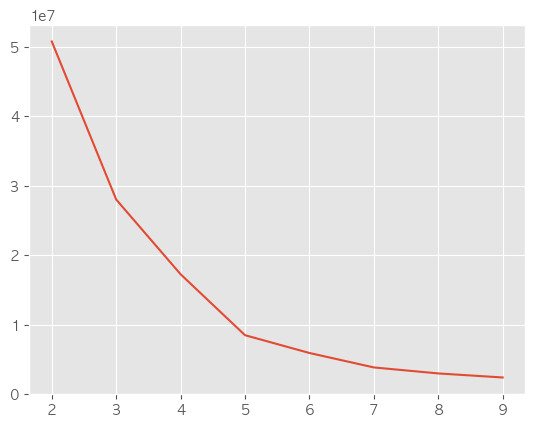

In [19]:
makeK(df2)

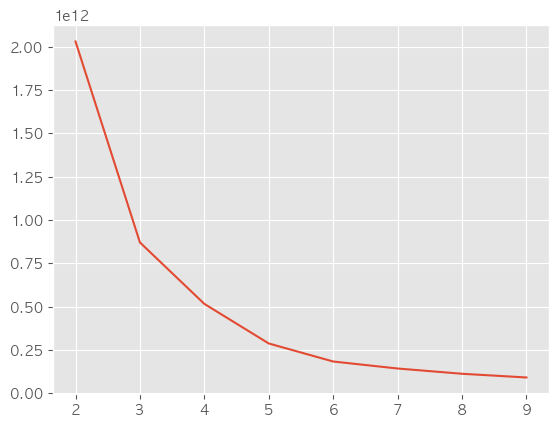

In [20]:
makeK(df3)

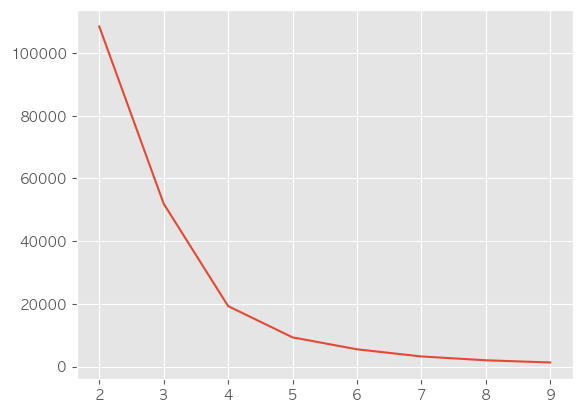

In [21]:
makeK(df4)

In [22]:
def makeScore(df1, df2):
    result = pd.DataFrame(df1.cluster_id == df2.cluster_id)
    print(result.value_counts())

In [23]:
# 출생아수 / 기업
makeScore(df1, df2)

cluster_id
False         97
True          39
dtype: int64


> 출생아수와 기업은 정답률 64%

In [24]:
# 출생아수 / 전출인구
makeScore(df1, df3)

cluster_id
False         116
True           20
dtype: int64


> 출생아수와 전출인구는 정답률 44%

In [25]:
# 출생아수 / 산부인과의원수
result = pd.DataFrame(df1.cluster_id == df4.cluster_id)
result.value_counts()

cluster_id
False         128
True            8
dtype: int64

In [26]:
# 기업 / 전출인구
result = pd.DataFrame(df2.cluster_id == df3.cluster_id)
result.value_counts()

cluster_id
False         77
True          59
dtype: int64

In [27]:
# 전출인구 / 산부인과
result = pd.DataFrame(df2.cluster_id == df4.cluster_id)
result.value_counts()

cluster_id
False         90
True          46
dtype: int64

In [28]:
len(df.columns)
df.columns

Index(['년도', '시도', '총인구', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '빈집수',
       '협회 및 단체, 수리 및 기타 개인서비스업 소멸', '도매 및 소매업 신생', '교육서비스업 소멸', '예금은행대출금액',
       '예금액'],
      dtype='object')

In [29]:
df1 = df[['년도', '시도', '총인구', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생', '예금은행대출금액', '예금액']]
# len(df1.columns)

In [30]:
# df1.to_csv("../../Data/03.통합.csv", encoding='utf-8', index=False)